# R2

# 2. Comprensión de los Datos

## 2.1 Ejecutar procesos de captura de datos.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
import random
import numpy as np

In [3]:
df= pd.read_csv("datos_tec-2.csv", parse_dates=["TIME"])
df.head()


,TIME,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
0,1995-01-01,100.0,368,2.78,15.1,29.7,0.053
1,1995-02-01,100.0,426,3.00,26.9,0.0,0.108
2,1995-03-01,101.0,446,3.00,29.5,0.0,0.098
3,1995-04-01,99.0,395,3.00,18.9,25.4,0.056
4,1995-05-01,102.0,380,3.00,17.5,26.6,0.051


## 2.2 Proporcionar una descripción de los datos.

In [4]:
df.dtypes

TIME         datetime64[ns]
Dureza              float64
Tasa_Prod             int64
Asp                 float64
EC                  float64
EE                  float64
Calidad             float64
dtype: object

In [5]:
print("Ultima fecha: " + str(min(df["TIME"])))
print("Ultima fecha: " + str(max(df["TIME"])))
print("El Dataset incluye datos desde 1995 hasta el 9 de Diciembre del 2020")

Ultima fecha: 1995-01-01 00:00:00
Ultima fecha: 2020-12-09 00:00:00
El Dataset incluye datos desde 1995 hasta el 9 de Diciembre del 2020


In [6]:
print("Registros: " + str(list(df.shape)[0]))
print("Variables: " + str(list(df.shape)[1]))

Registros: 9392
Variables: 7


## 2.3 Realizar tareas de exploración de datos.


In [7]:
df.describe()

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
count,9391.000000,9392.000000,9391.000000,9392.000000,9392.000000,9392.000000
mean,104.028644,391.005111,3.152306,19.362425,19.059135,0.089891
std,2.049060,43.352777,0.375251,6.698657,8.035162,0.048819
min,80.000000,0.000000,0.090000,0.000000,0.000000,0.000000
25%,103.000000,383.000000,3.040000,15.900000,14.200000,0.061000
50%,104.000000,398.000000,3.260000,19.200000,20.000000,0.081000
75%,105.000000,408.000000,3.380000,23.500000,25.200000,0.107000
max,112.000000,480.000000,3.520000,40.400000,35.300000,1.000000


<IPython.core.display.Javascript object>


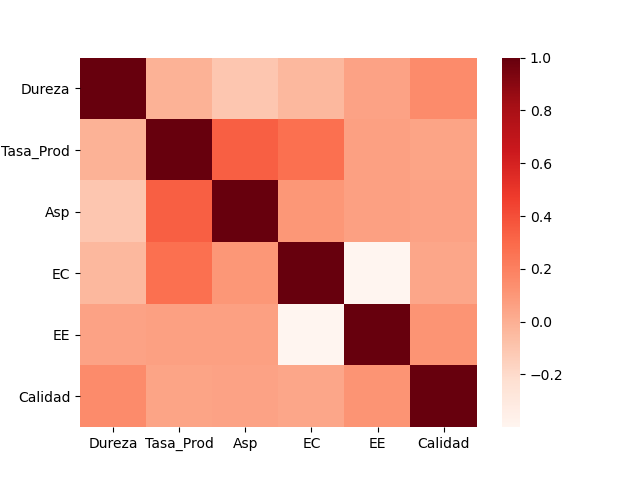

In [8]:
corr_table= df.corr()
sns.heatmap(corr_table, cmap= "Reds")

In [9]:
corr_table

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
Dureza,1.000000,-0.007480,-0.102830,-0.036141,0.056661,0.156045
Tasa_Prod,-0.007480,1.000000,0.342627,0.274061,0.069168,0.053014
Asp,-0.102830,0.342627,1.000000,0.108508,0.067365,0.056779
EC,-0.036141,0.274061,0.108508,1.000000,-0.399944,0.039689
EE,0.056661,0.069168,0.067365,-0.399944,1.000000,0.116076
Calidad,0.156045,0.053014,0.056779,0.039689,0.116076,1.000000


<IPython.core.display.Javascript object>


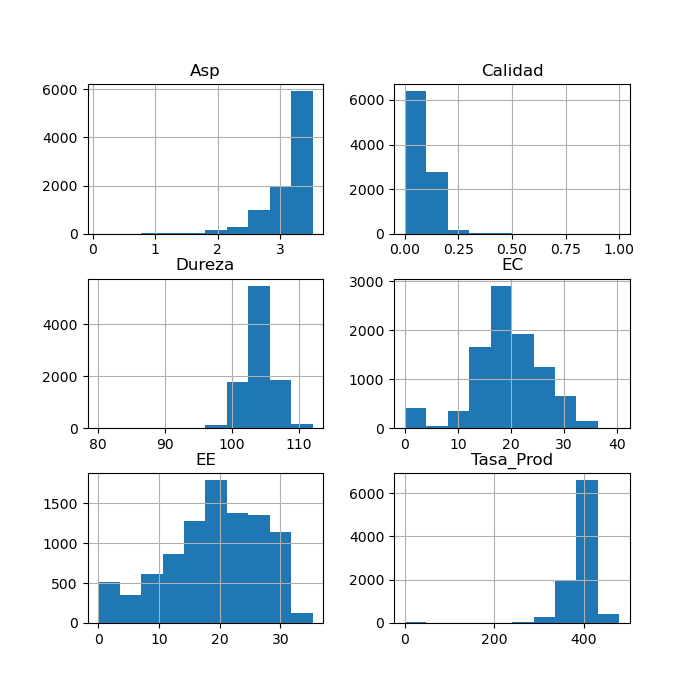

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4002FFB80>,
      dtype=object)

In [10]:
df.hist(figsize=(7, 7))

<IPython.core.display.Javascript object>


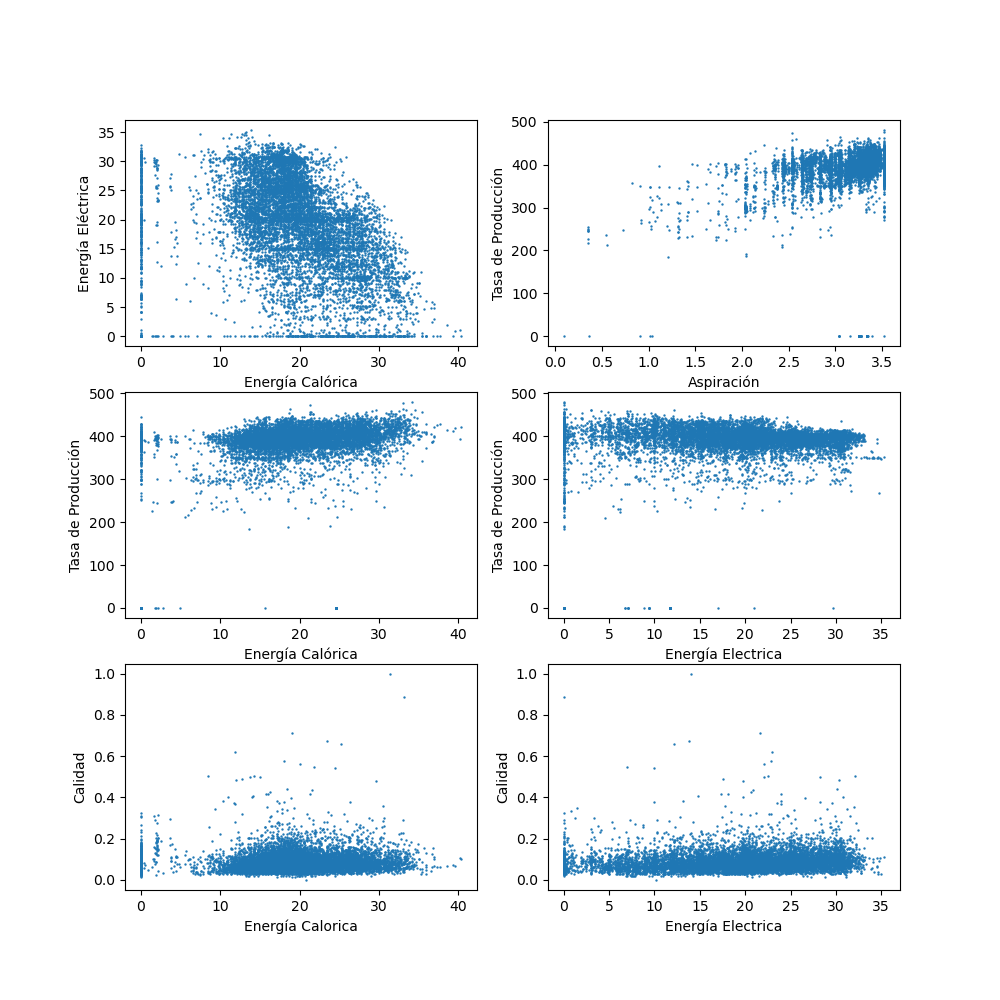

In [11]:
fig = plt.figure(figsize=(10, 10))

plot1 = fig.add_subplot(321)
plot2 = fig.add_subplot(322)
plot3 = fig.add_subplot(323)
plot4 = fig.add_subplot(324)
plot5 = fig.add_subplot(325)
plot6 = fig.add_subplot(326)

plot1.scatter(df["EC"], df["EE"], s=0.5)
plot2.scatter(df["Asp"], df["Tasa_Prod"], s=0.5)
plot3.scatter(df["EC"], df["Tasa_Prod"], s=0.5)
plot4.scatter(df["EE"], df["Tasa_Prod"], s=0.5)
plot5.scatter(df["EC"], df["Calidad"], s=0.5)
plot6.scatter(df["EE"], df["Calidad"], s=0.5)

plot1.set_xlabel("Energía Calórica")
plot1.set_ylabel("Energía Eléctrica")
plot2.set_xlabel('Aspiración')
plot2.set_ylabel("Tasa de Producción")
plot3.set_xlabel("Energía Calórica")
plot3.set_ylabel("Tasa de Producción")
plot4.set_xlabel('Energía Electrica')
plot4.set_ylabel("Tasa de Producción")
plot5.set_xlabel("Energía Calorica")
plot5.set_ylabel("Calidad")
plot6.set_xlabel('Energía Electrica')
plot6.set_ylabel("Calidad")

plt.show()

In [12]:
#sns.boxplot(x= df["Dureza"], showfliers= True)

In [13]:
#sns.boxplot(x= df["Tasa_Prod"], showfliers= True)

In [14]:
#sns.boxplot(x= df["Asp"], showfliers= True)

In [15]:
#sns.boxplot(x= df["EC"], showfliers= True)

In [16]:
#sns.boxplot(x= df["EE"], showfliers= True)

In [17]:
#sns.boxplot(x= df["Calidad"], showfliers= False)

## 2.4 Gestionar la calidad de los datos.

In [18]:
df=df[(df["Calidad"]> 0) & (df["Tasa_Prod"]>0)]
df=df[(df["EE"]>=0) | (df["EC"]>=0)]
df

,TIME,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
0,1995-01-01,100.0,368,2.78,15.1,29.7,0.053
1,1995-02-01,100.0,426,3.00,26.9,0.0,0.108
2,1995-03-01,101.0,446,3.00,29.5,0.0,0.098
3,1995-04-01,99.0,395,3.00,18.9,25.4,0.056
4,1995-05-01,102.0,380,3.00,17.5,26.6,0.051
...,...,...,...,...,...,...,...
9387,2020-09-13,104.0,413,3.52,16.9,24.8,0.108
9388,2020-09-14,101.0,408,3.52,21.7,13.9,0.061
9389,2020-09-15,100.0,352,3.52,15.6,17.6,0.031
9390,2020-09-16,100.0,399,3.52,17.0,22.8,0.059


## 3.2 Realizar tareas de limpieza de datos

In [19]:
print("Total de valores nulos en el dataframe: ", df.isna().sum().sum())

Total de valores nulos en el dataframe:  2


In [20]:
df_no_na=df.dropna()
df_no_na.isna().sum()

TIME         0
Dureza       0
Tasa_Prod    0
Asp          0
EC           0
EE           0
Calidad      0
dtype: int64

In [21]:
df.shape

(9323, 7)

In [22]:
no_fechas= df_no_na.copy().drop("TIME", 1)

z_scores = np.abs(scp.stats.zscore(no_fechas))
filtrados = (z_scores < 2.5).all(axis=1)
no_fechas_filtrado = no_fechas[filtrados]

date= df_no_na[filtrados]["TIME"]
no_fechas_filtrado["TIME"] = date
df_no_na= no_fechas_filtrado.copy()
df_no_na.reset_index(drop=True)

<ipython-input-22-9546f76901ab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_fechas_filtrado["TIME"] = date


,Dureza,Tasa_Prod,Asp,EC,EE,Calidad,TIME
0,100.0,368,2.78,15.1,29.7,0.053,1995-01-01
1,100.0,426,3.00,26.9,0.0,0.108,1995-02-01
2,101.0,446,3.00,29.5,0.0,0.098,1995-03-01
3,99.0,395,3.00,18.9,25.4,0.056,1995-04-01
4,102.0,380,3.00,17.5,26.6,0.051,1995-05-01
...,...,...,...,...,...,...,...
8308,103.0,409,3.52,23.0,9.1,0.103,2020-12-09
8309,104.0,413,3.52,16.9,24.8,0.108,2020-09-13
8310,101.0,408,3.52,21.7,13.9,0.061,2020-09-14
8311,100.0,352,3.52,15.6,17.6,0.031,2020-09-15


In [23]:
df_no_na=df_no_na.set_index(['TIME', ])


## Exploración Y Visualización de datos 

### Histograma Ahora:

<IPython.core.display.Javascript object>


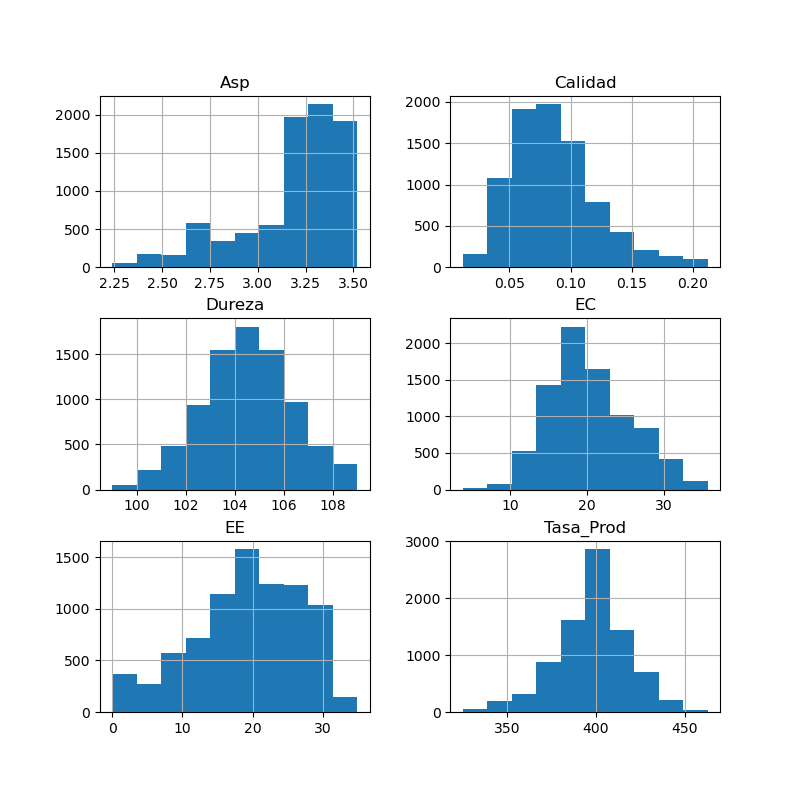

(8313, 6)

In [24]:
df_no_na.hist(figsize=(8, 8))
display(df_no_na.shape)

### Histograma De Archivo Original:

<IPython.core.display.Javascript object>


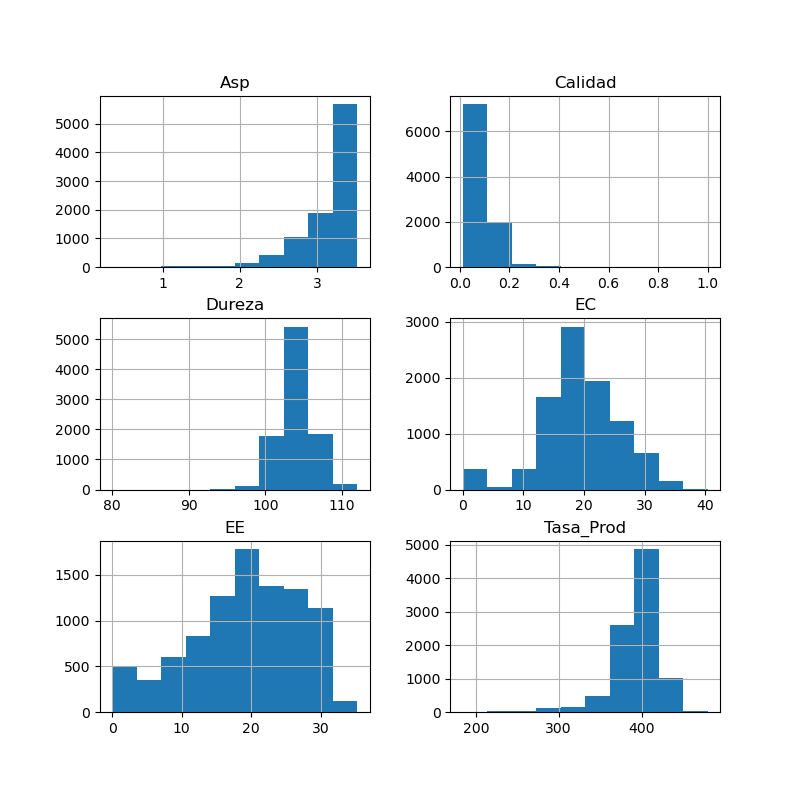

(9323, 7)

In [25]:
df.hist(figsize=(8,8))
display(df.shape)

### Scatter Plots (Postprocessed)

<IPython.core.display.Javascript object>


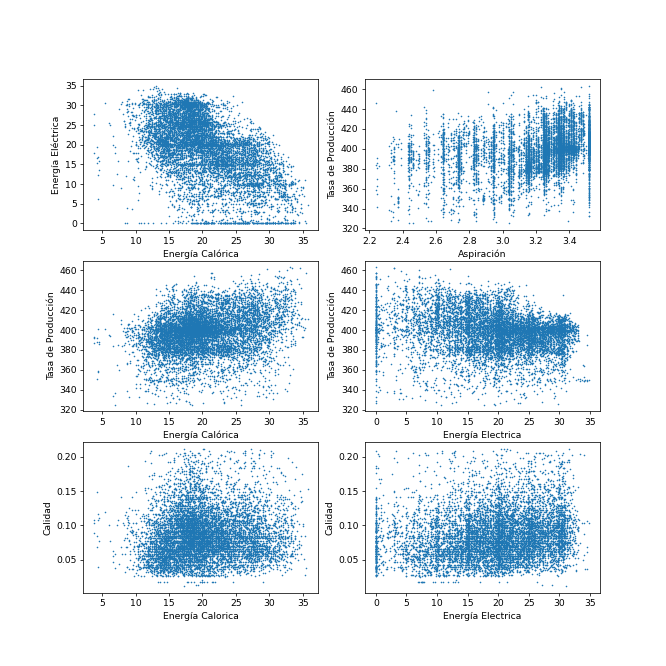

In [29]:
fig = plt.figure(figsize=(10, 10))

plot1 = fig.add_subplot(321)
plot2 = fig.add_subplot(322)
plot3 = fig.add_subplot(323)
plot4 = fig.add_subplot(324)
plot5 = fig.add_subplot(325)
plot6 = fig.add_subplot(326)

plot1.scatter(df_no_na["EC"], df_no_na["EE"], s=0.5)
plot2.scatter(df_no_na["Asp"], df_no_na["Tasa_Prod"], s=0.5)
plot3.scatter(df_no_na["EC"], df_no_na["Tasa_Prod"], s=0.5)
plot4.scatter(df_no_na["EE"], df_no_na["Tasa_Prod"], s=0.5)
plot5.scatter(df_no_na["EC"], df_no_na["Calidad"], s=0.5)
plot6.scatter(df_no_na["EE"], df_no_na["Calidad"], s=0.5)

plot1.set_xlabel("Energía Calórica")
plot1.set_ylabel("Energía Eléctrica")
plot2.set_xlabel('Aspiración')
plot2.set_ylabel("Tasa de Producción")
plot3.set_xlabel("Energía Calórica")
plot3.set_ylabel("Tasa de Producción")
plot4.set_xlabel('Energía Electrica')
plot4.set_ylabel("Tasa de Producción")
plot5.set_xlabel("Energía Calorica")
plot5.set_ylabel("Calidad")
plot6.set_xlabel('Energía Electrica')
plot6.set_ylabel("Calidad")

plt.show()

### Correlación de varibales

<IPython.core.display.Javascript object>


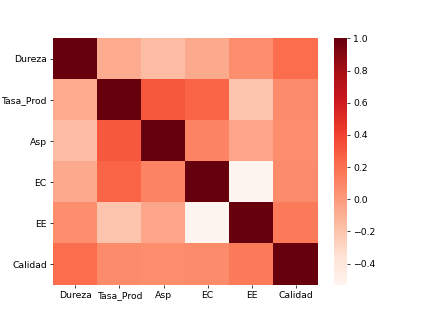

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
Dureza,1.000000,-0.071917,-0.159738,-0.069071,0.062150,0.220496
Tasa_Prod,-0.071917,1.000000,0.308839,0.254653,-0.191771,0.077003
Asp,-0.159738,0.308839,1.000000,0.111146,-0.046990,0.066725
EC,-0.069071,0.254653,0.111146,1.000000,-0.532418,0.077289
EE,0.062150,-0.191771,-0.046990,-0.532418,1.000000,0.160079
Calidad,0.220496,0.077003,0.066725,0.077289,0.160079,1.000000


In [30]:
corr_table= df_no_na.corr()
sns.heatmap(corr_table, cmap= "Reds")
display(corr_table)

## SCATTER PLOTS 3D

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()


plot1_3d = plt.axes(projection ="3d")
plot1_3d.scatter(df_no_na["EE"], df_no_na["EC"], df_no_na["Calidad"], c='blue', marker='o', s=0.3)
plot1_3d.set_xlabel("Energía Eléctrica")
plot1_3d.set_ylabel("Energía Calórica")
plot1_3d.set_zlabel("Calidad")

for i in range(0, 360):
    plot1_3d.view_init(None, i)
    plt.show()

fig = plt.figure()
plot2_3d = plt.axes(projection ="3d")
plot2_3d.scatter(df_no_na["Asp"], df_no_na["EC"], df_no_na["Tasa_Prod"], c='r', marker='o', s=0.2)

plot2_3d.set_xlabel("Aspiración")
plot2_3d.set_ylabel("Energía Calórica")
plot2_3d.set_zlabel("Tasa de Producción")

for i in range(0, 360, 45):
    plot2_3d.view_init(None, i)
    plt.show()

fig = plt.figure()
plot3_3d = plt.axes(projection ="3d")
plot3_3d.scatter(df_no_na["EE"], df_no_na["EC"], df_no_na["Dureza"], c='purple', marker='o', s=0.2)
plot3_3d.set_xlabel("Energía Electrica")
plot3_3d.set_ylabel("Energía Calórica")
plot3_3d.set_zlabel("Dureza")

for i in range(0, 360, 45):
    plot3_3d.view_init(None, i)
    plt.show()

Adicional a los puntos anteriores, podemos considerar lo siguiente:

Creamos columnas con el gasto energético ponderado por unidad de producción y también el COSTO ponderado a partir de la relación de entre los costes de las dos fuentes de energía (calórica y eléctrica) . Precio EC / Precio EE = 0.724

C1 = 1   #costo por unidad de energía de alimentación primaria
C2 = 0.724 #costo por unidad de energía de alimentación

#Crear una columna de "Costo" considerando C1 para EE y C2 para EC.

#Establecemos columnas ponderadas: 'Costo_Ponderado', 'EC_Ponderado', 'EE_Ponderado'. Para estas columnas ponderadas contemplamos la tasa de producción.

## Generación de columan de costos

In [31]:
df_no_na['EC/unidad'] = (df_no_na['EC']/df_no_na['Tasa_Prod'])*0.724
df_no_na['EE/unidad'] = (df_no_na['EE']/df_no_na['Tasa_Prod'])
#df_no_na['Costo Total'] = (df_no_na['EC/unidad']+df_no_na['EE/unidad'])*df_no_na['Tasa_Prod']
df_no_na['Costo Pond'] = (df_no_na['EC/unidad']+df_no_na['EE/unidad'])
df_no_na.to_csv("df_no_na.csv")
df_no_na

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad,EC/unidad,EE/unidad,Costo Pond
TIME,,,,,,,,,
1995-01-01,100.0,368,2.78,15.1,29.7,0.053,0.029708,0.080707,0.110414
1995-02-01,100.0,426,3.00,26.9,0.0,0.108,0.045717,0.000000,0.045717
1995-03-01,101.0,446,3.00,29.5,0.0,0.098,0.047888,0.000000,0.047888
1995-04-01,99.0,395,3.00,18.9,25.4,0.056,0.034642,0.064304,0.098946
1995-05-01,102.0,380,3.00,17.5,26.6,0.051,0.033342,0.070000,0.103342
...,...,...,...,...,...,...,...,...,...
2020-12-09,103.0,409,3.52,23.0,9.1,0.103,0.040714,0.022249,0.062963
2020-09-13,104.0,413,3.52,16.9,24.8,0.108,0.029626,0.060048,0.089675
2020-09-14,101.0,408,3.52,21.7,13.9,0.061,0.038507,0.034069,0.072575


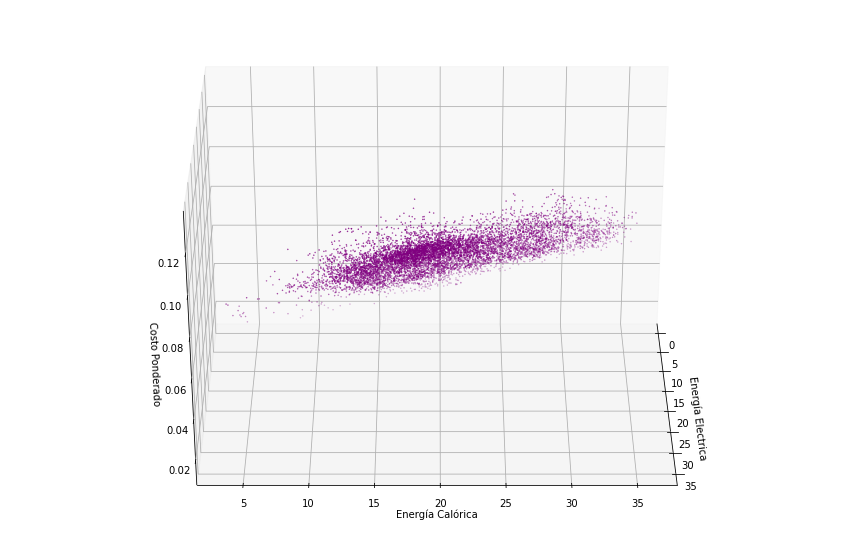

In [38]:
fig = plt.figure(figsize=(15, 10))
plot3_3d = plt.axes(projection ="3d")
plot3_3d.scatter(df_no_na["EE"], df_no_na["EC"], df_no_na["Costo Pond"], c='purple', marker='o', s=0.2)
plot3_3d.set_xlabel("Energía Electrica")
plot3_3d.set_ylabel("Energía Calórica")
plot3_3d.set_zlabel("Costo Ponderado")

for i in range(0, 360, 45):
    plot3_3d.view_init(None, i)
    plt.show()

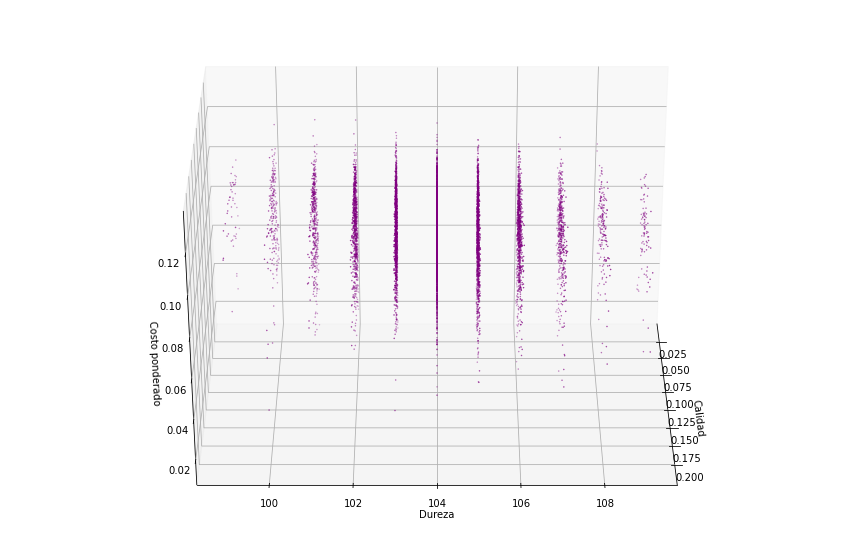

In [37]:
fig = plt.figure(figsize=(15,10))
plot3_3d = plt.axes(projection ="3d")
plot3_3d.scatter(df_no_na["Calidad"], df_no_na["Dureza"], df_no_na["Costo Pond"], c='purple', marker='o', s=0.2)
plot3_3d.set_xlabel("Calidad")
plot3_3d.set_ylabel("Dureza")
plot3_3d.set_zlabel("Costo ponderado")

for i in range(0, 360, 45):
    plot3_3d.view_init(None, i)
    plt.show()

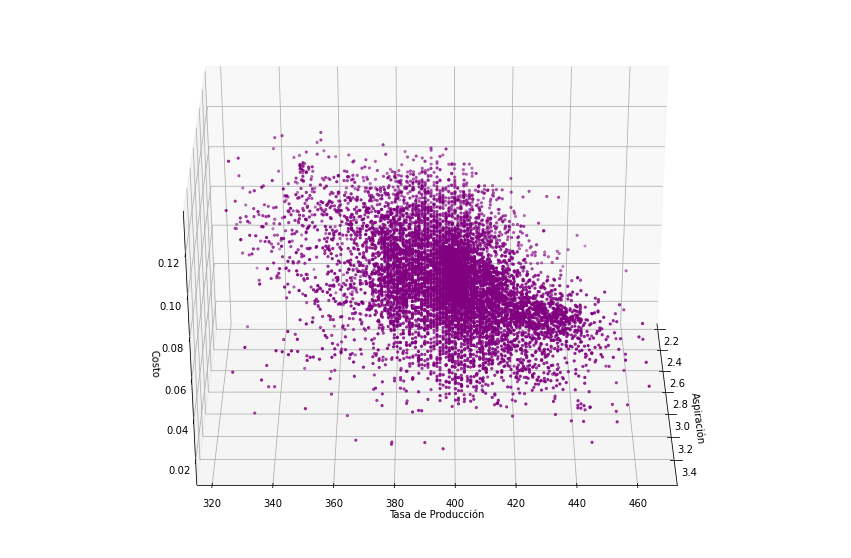

In [41]:
fig = plt.figure(figsize=(15, 10))
plot3_3d = plt.axes(projection ="3d")
plot3_3d.scatter(df_no_na["Asp"], df_no_na["Tasa_Prod"], df_no_na["Costo Pond"], c='purple', marker='o', s=5)
plot3_3d.set_xlabel("Aspiración")
plot3_3d.set_ylabel("Tasa de Producción")
plot3_3d.set_zlabel("Costo")

for i in range(0, 360, 45):
    plot3_3d.view_init(None, i)
    plt.show()

### Para visualizar, se grafica la dispercion entre las variables de "Costo Ponderado" y "Calidad" del dataframe resultante:

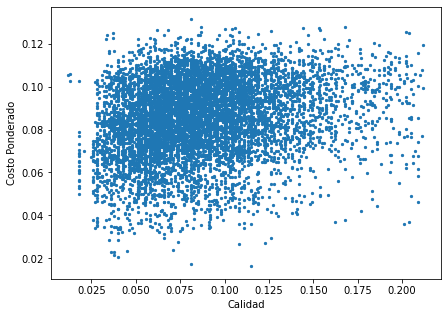

In [127]:
fig = plt.figure(figsize=(7, 5))

plot1 = fig.add_subplot(111)
plot1.scatter(df_no_na["Calidad"], df_no_na["Costo Pond"], s=5, cmap="gray")
plot1.set_xlabel("Calidad")
plot1.set_ylabel("Costo Ponderado")
plt.show()